In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
from dataclasses import dataclass
import glob

import sklearn
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Model
from keras.callbacks import ReduceLROnPlateau

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import warnings
warnings.filterwarnings("ignore")

In [2]:
@dataclass
class CONFIG:
    IMAGES_DIRECTORY = "/kaggle/input/plantvillage-dataset/color/"

In [3]:
image_filepaths_list = []
labels_list = []

for image_filepath in glob.glob(CONFIG.IMAGES_DIRECTORY + "*/*"):
    image_filepaths_list.append(image_filepath)
    label = image_filepath.split("/")[-2]
    labels_list.append(label)
    
print(f"Total number of images: {len(image_filepaths_list)}")
print(f"Total number of images: {len(labels_list)}")

Total number of images: 54305
Total number of images: 54305


In [4]:
df = pd.DataFrame({
    "image_filepaths": image_filepaths_list,
    "labels": labels_list
})

assert len(image_filepaths_list) == len(labels_list) == len(df)

df

,image_filepaths,labels
0,/kaggle/input/plantvillage-dataset/color/Tomat...,Tomato___Late_blight
1,/kaggle/input/plantvillage-dataset/color/Tomat...,Tomato___Late_blight
2,/kaggle/input/plantvillage-dataset/color/Tomat...,Tomato___Late_blight
3,/kaggle/input/plantvillage-dataset/color/Tomat...,Tomato___Late_blight
4,/kaggle/input/plantvillage-dataset/color/Tomat...,Tomato___Late_blight
...,...,...
54300,/kaggle/input/plantvillage-dataset/color/Corn_...,Corn_(maize)___healthy
54301,/kaggle/input/plantvillage-dataset/color/Corn_...,Corn_(maize)___healthy
54302,/kaggle/input/plantvillage-dataset/color/Corn_...,Corn_(maize)___healthy
54303,/kaggle/input/plantvillage-dataset/color/Corn_...,Corn_(maize)___healthy


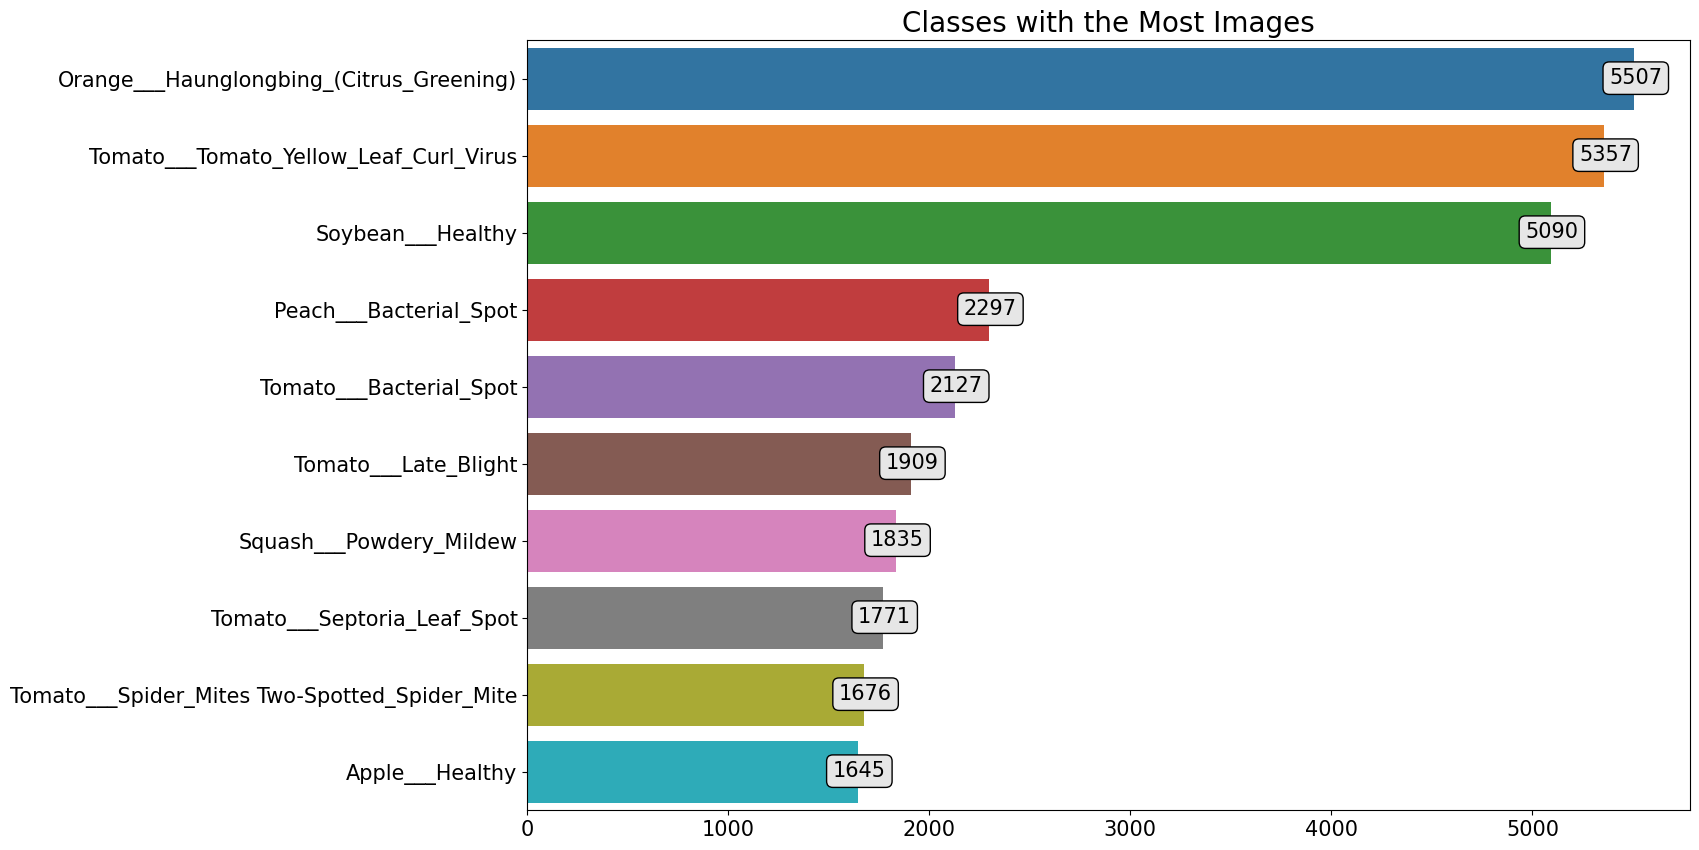

In [6]:
keys = df['labels'].value_counts().index.tolist()[0:10]
keys = [plant.title() for plant in keys]
values = df['labels'].value_counts().to_list()[0:10]
plt.figure(figsize = (15, 10))
ax = sns.barplot(x = values, y = keys)
plt.title('Classes with the Most Images', fontsize = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
    width = p.get_width()
    plt.text(7 + p.get_width(), p.get_y() + 0.49 * p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center',
             color = 'black',
             bbox = bbox_args,
             fontsize = 15)

plt.show()